In [4]:
!gdown --id 1xkynpL15pt6KT3YSlDimu4A5iRU9qYck

c:\users\user\anaconda3\lib\site-packages\gdown\cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1xkynpL15pt6KT3YSlDimu4A5iRU9qYck
To: D:\IBM\TEAM_MEMBER(191021076)\Flowers-Dataset.zip

  0%|          | 0.00/236M [00:00<?, ?B/s]
  0%|          | 524k/236M [00:00<06:07, 640kB/s]
  0%|          | 1.05M/236M [00:02<08:00, 488kB/s]
  1%|          | 1.57M/236M [00:02<06:32, 596kB/s]
  1%|          | 2.10M/236M [00:03<05:45, 675kB/s]
  1%|1         | 2.62M/236M [00:03<04:34, 848kB/s]
  1%|1         | 3.15M/236M [00:04<05:09, 751kB/s]
  2%|1         | 3.67M/236M [00:05<05:03, 765kB/s]
  2%|1         | 4.19M/236M [00:05<04:17, 899kB/s]
  2%|2         | 4.72M/236M [00:05<03:44, 1.03MB/s]
  2%|2         | 5.24M/236M [00:06<03:30, 1.09MB/s]
  2%|2         | 5.77M/236M [00:06<03:12, 1.19MB/s]
  3%|2         | 6.29M/236M [00:06<

 99%|#########9| 234M/236M [04:17<00:01, 1.52MB/s]
 99%|#########9| 234M/236M [04:18<00:00, 1.64MB/s]
100%|#########9| 235M/236M [04:19<00:00, 1.11MB/s]
100%|#########9| 235M/236M [04:19<00:00, 1.37MB/s]
100%|##########| 236M/236M [04:19<00:00, 1.39MB/s]
100%|##########| 236M/236M [04:19<00:00, 909kB/s] 


In [3]:
!pip install gdown

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for gdown: filename=gdown-4.5.1-py3-none-any.whl size=14933 sha256=e3961b727f3f6820b94ea0a97dec721c0b6e63f48c2dad0bb76a08a099ae2c17
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\8d\df\71\846b2aa0fabaac2af23fbc5214eeaa55f0616e9d1a05187d72
Successfully built gdown


In [6]:
!pip install unzip

  Created wheel for unzip: filename=unzip-1.0.0-py3-none-any.whl size=1330 sha256=5a79608e238c2d8846cbd6a77a4313c9ff94eee23818444a2f79f0bbe1ebc276
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\90\bd\0f\a2797a7e90de1cdd91548fba3b16a7c2560e14a268bb137101
Successfully built unzip


# 1.DOWNLOAD THE DATA SET

In [73]:
import zipfile
with zipfile.ZipFile("D:/IBM/TEAM_MEMBER(191021076)/Flowers-Dataset.zip", 'r') as zip_ref:
        zip_ref.extractall('data/raw')

# 2.IMAGE AUGMENTATION

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [28]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

In [29]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [31]:
xtrain=train_datagen.flow_from_directory("D:/IBM/TEAM_MEMBER(191021076)/data/raw/flowers",
                                         target_size=(76,76),
                                         class_mode='categorical',
                                         batch_size=100)

Found 4317 images belonging to 5 classes.


In [36]:
xtest=test_datagen.flow_from_directory("D:/IBM/TEAM_MEMBER(191021076)/data/raw/flowers",
                                         target_size=(76,76),
                                         class_mode='categorical',
                                         batch_size=100)

Found 4317 images belonging to 5 classes.


# 3.CREATE MODEL

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPool2D,Flatten,Dense

# 4.ADD LAYERS

In [33]:
model=Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(76,76,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(4,activation='softmax'))

# 5.COMPILE THE MODEL

In [34]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# 6.FIT THE MODEL

In [45]:
model.add(Dense(10,activation="softmax"))#xtrain,steps_per_epoch = len(xtrain),epochs = 1,validation_data = xtest,validation_steps = len(xtest))

# 7.SAVE THE MODEL

In [46]:
model.save('flowers.h5')

# 8.TESTING THE MODEL

In [47]:
from tensorflow.keras.preprocessing import image
import numpy as np

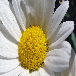

In [50]:
img=image.load_img("D:/IBM/TEAM_MEMBER(191021076)/data/raw/flowers/daisy/10140303196_b88d3d6cec.jpg",target_size=(76,76))
img

In [51]:
x=image.img_to_array(img)
x
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x))
pred
op=['daisy','dandelion','rose','sunflower','tulip']
op[pred]

'daisy'

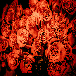

In [64]:
img1=image.load_img("D:/IBM/TEAM_MEMBER(191021076)/data/raw/flowers/rose/10503217854_e66a804309.jpg",target_size=(76,76))
img1

In [65]:
x=image.img_to_array(img1)
x
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x))
pred
op=['rose','dandelion','daisy','sunflower','tulip']
op[pred]

'rose'

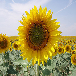

In [66]:
img2=image.load_img('D:/IBM/TEAM_MEMBER(191021076)/data/raw/flowers/sunflower/1022552002_2b93faf9e7_n.jpg',target_size=(76,76))
img2

In [67]:
x=image.img_to_array(img2)
x
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x))
pred
op=['sunflower','dandelion','rose','daisy','tulip']
op[pred]

'sunflower'

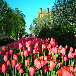

In [68]:
img3=image.load_img('D:/IBM/TEAM_MEMBER(191021076)/data/raw/flowers/tulip/2087981909_fd468de5c4_n.jpg',target_size=(76,76))
img3

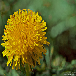

In [72]:
img4=image.load_img('D:/IBM/TEAM_MEMBER(191021076)/data/raw/flowers/dandelion/3383422012_6c9d83671f_n.jpg',target_size=(76,76))
img4